\begin{align}
P([X_1 = P]) &= P([X_1 = P] \cap [X_0 = P] \cup [X_1 = P] \cap [X_0 = S] \cup [X_1 = P] \cap [X_0 = N]) \\
             &= P([X_1 = P] \cap [X_0 = P]) + P([X_1 = P] \cap [X_0 = S]) + P([X_1 = P] \cap [X_0 = N]) \\
             &= P_{X_0 = P}(X_1 = P) \cdot P(X_0 = P) + P_{X_0 = S}(X_1 = P) \cdot P(X_0 = S) + P_{X_0 = N}(X_1 = P) \cdot P(X_0 = N) \\
\end{align}

$
A = 
\left(
\begin{array}{c|cccccccccccc}
 & P & S & N \\ \hline
P & 0.6 & 0.1 & 0.3 \\
S & 0.2 & 0.6 & 0.2 \\
N & 0.4 & 0.0 & 0.6
\end{array}
\right)
$

In [1]:
from sympy import Matrix

mu_0 = Matrix([[1], [0], [0]])

A = Matrix([
    [0.6, 0.1, 0.3],
    [0.2, 0.6, 0.2],
    [0.4, 0.0, 0.6]
])

A = A.T

def calculate_distribution_symbolic(mu_0, A, steps=1):
    mu_t = mu_0
    for _ in range(steps):
        mu_t = A * mu_t
    return mu_t

steps = 50

for t in range(steps):
    mu_t = calculate_distribution_symbolic(mu_0, A, t)
    print(f"Distribution µ_{t}:\n{mu_t}\n")

Distribution µ_0:
Matrix([[1], [0], [0]])

Distribution µ_1:
Matrix([[0.600000000000000], [0.100000000000000], [0.300000000000000]])

Distribution µ_2:
Matrix([[0.500000000000000], [0.120000000000000], [0.380000000000000]])

Distribution µ_3:
Matrix([[0.476000000000000], [0.122000000000000], [0.402000000000000]])

Distribution µ_4:
Matrix([[0.470800000000000], [0.120800000000000], [0.408400000000000]])

Distribution µ_5:
Matrix([[0.470000000000000], [0.119560000000000], [0.410440000000000]])

Distribution µ_6:
Matrix([[0.470088000000000], [0.118736000000000], [0.411176000000000]])

Distribution µ_7:
Matrix([[0.470270400000000], [0.118250400000000], [0.411479200000000]])

Distribution µ_8:
Matrix([[0.470404000000000], [0.117977280000000], [0.411618720000000]])

Distribution µ_9:
Matrix([[0.470485344000000], [0.117826768000000], [0.411687888000000]])

Distribution µ_10:
Matrix([[0.470531715200000], [0.117744595200000], [0.411723689600000]])

Distribution µ_11:
Matrix([[0.470557424000000]

On voit donc qu'il y a une convergence vers un état stable. On peut donc calculer la probabilité de chaque état stable en fonction de la matrice de transition.

On sait que :
$ A*{µ_0} = A*{µ*1} $
$ A*{µ*1} = A*{µ_2} $

On peut donc écrire :
$ A*{µ_n} = A*{µ\_{n+1}} $

Pour $ µ*n \to µ $ on a : $ A*{µ} = µ $

On tend donc vers un état stable qu'on appelle la distribution stationnaire.

Pour trouver la distribution stationnaire on peut résoudre le système d'équations suivant :

$
A \cdot 
\begin{pmatrix} 
x \\ y \\ z 
\end{pmatrix}
= \begin{pmatrix} x \\ y \\ z \end{pmatrix}
$

Mais il faut d'abord s'assurer qu'il y a une convergence vers un état stable. Pour cela on peut utiliser le théroème de Chapman-Kolmogorov

Ce théorème nous dit que si on a une chaîne de Markov homogène, alors la probabilité de passer de l'état i à l'état j en n étapes est égale à la probabilité de passer de l'état i à l'état k en m étapes et de passer de l'état k à l'état j en n-m étapes.

$E$ est l'ensemble des états possibles de la chaîne de Markov : $E = \{P, S, N\}$ 

\begin{align}
P(X_n = j | X_0 = i) &= \sum_{k \in E} P(X_n = j | X_{n-1} = k) \cdot P(X_{n-1} = k | X_0 = i)
\end{align}

- Irréductibilité : Pour vérifier cela, il faut s’assurer que tous les états sont accessibles depuis n’importe quel autre état. En regardant ta matrice  A , tu vois que chaque état a une probabilité non nulle de passer à un autre état en une ou plusieurs étapes. Par exemple :
	- On peut aller de  P  à  S  (probabilité 0.1) ou à  N  (probabilité 0.3).
	- On peut aller de  S  à  P  (probabilité 0.2) ou à  N  (probabilité 0.2).
	- On peut aller de  N  à  P  (probabilité 0.4).

Cela montre que la chaîne est irréductible, car tous les états sont accessibles depuis n’importe quel autre état, soit directement, soit en plusieurs étapes.
- Aperiodicité : Vérifier si la chaîne est apériodique revient à s’assurer qu’il n’y a pas de cycle fixe. En analysant la matrice, on constate que les transitions peuvent se faire à différents moments. Par exemple, de  P  à  S , puis de  S  à  N , et vice versa, ce qui suggère qu’il n’y a pas de cycle rigide, et donc la chaîne est apériodique.

On peut donc résoudre le système d'équations suivant :

$
A \cdot
\begin{pmatrix}
x \\ y \\ z
\end{pmatrix}
= \begin{pmatrix}
x \\ y \\ z
\end{pmatrix}
$

On a donc :

$
\begin{pmatrix}
0.6 & 0.1 & 0.3 \\
0.2 & 0.6 & 0.2 \\
0.4 & 0.0 & 0.6
\end{pmatrix} 
\cdot
\begin{pmatrix}
x \\ y \\ z
\end{pmatrix}
= \begin{pmatrix}
x \\ y \\ z
\end{pmatrix}
$

On inverse la matrice A pour obtenir :

$
\begin{cases}
0.6x + 0.2y + 0.4z = x \\
0.1x + 0.6y + 0.0z = y \\
0.3x + 0.2y + 0.6z = z
\end{cases}
$

Pour chaque équation, on soustrait les termes du côté droit pour obtenir une forme plus simple :

Première équation :

\begin{align}
0.6x + 0.2y + 0.4z - x &= 0 \\
-x + 0.6x + 0.2y + 0.4z &= 0 \\
-0.4x + 0.2y + 0.4z &= 0 \\
\end{align}

Deuxième équation :

\begin{align}
0.1x + 0.6y + 0.0z - y &= 0 \\
0.1x - y + 0.6y &= 0 \\
0.1x - 0.4y &= 0 \\
\end{align}

Troisième équation :

\begin{align}
0.3x + 0.2y + 0.6z - z &= 0 \\
0.3x + 0.2y - z + 0.6z &= 0 \\
0.3x + 0.2y - 0.4z &= 0 \\
\end{align}

On peut simplifier la deuxième équation :

\begin{align}
0.1x - 0.4y &= 0 \\
0.4y &= 0.1x \\
y &= \frac{0.1x}{0.4} \\
y &= \frac{x}{4}
\end{align}

On remplace y dans la première équation :

\begin{align}
-0.4x + 0.2y + 0.4z &= 0 \\
-0.4x + 0.2 \cdot \frac{x}{4} + 0.4z &= 0 \\
-0.4x + 0.05x + 0.4z &= 0 \\
-0.35x + 0.4z &= 0 \\
0.35x &= 0.4z \\
z &= \frac{0.35x}{0.4} \\
z &= \frac{7x}{8}
\end{align}

On remplace y et z dans la troisième équation :

\begin{align}
0.3x + 0.2y - 0.4z &= 0 \\
0.3x + 0.2 \cdot \frac{x}{4} - 0.4 \cdot \frac{7x}{8} &= 0 \\
0.3x + 0.05x - 0.35x &= 0 \\
0.7x &= 0 \\
x &= 0
\end{align}

Comme x, y, z représentent les probabilités des états P, S, N respectivement, nous imposons que la somme des probabilités soit égale à 1 :

\begin{align}
x + y + z &= 1
\end{align}

En remplaçant y = \frac{x}{4} et z = \frac{7x}{8}, nous obtenons :

\begin{align}
x + \frac{x}{4} + \frac{7x}{8} &= 1 \\
\end{align}

Trouvons un dénominateur commun pour simplifier l'équation :


## PageRank : Définition et Explication

Le but de **PageRank** est de donner un score basé uniquement sur les liens entre les pages. Plus une page est référencée par d'autres pages, plus elle est importante. Cependant, l'importance de chacun de ces référencements dépend de l'importance de la page qui fait le référencement. C'est une technique de **Link-Based Ranking**.

### Modélisation avec un graphe

Dans un graphe :

- Un **nœud** représente une page.
- Un **lien** est une redirection vers une autre page.

### Formule de PageRank

La formule de PageRank pour une page $P_i$ est donnée par :

$$
PR(P_i) = \frac{1 - p}{n} + p \sum_{j \in M_i} \frac{PR(P_j)}{L(P_j)}
$$

- $PR(P_i)$ : Le score PageRank de la page $P_i$.
- $p$ : Le facteur de probabilité de rester sur une page (typiquement $p = 0.85$).
- $n$ : Le nombre total de pages.
- $M_i$ : L'ensemble des pages qui pointent vers $P_i$.
- $L(P_j)$ : Le nombre de liens sortants de la page $P_j$.

### Explication de la formule

Lorsque l'on est sur une page, on a une probabilité $p$ de rester sur cette page et une probabilité $1 - p$ d'aller sur une page aléatoire.

Ainsi, une page a une probabilité d'être choisie de :

$$
\frac{1 - p}{n}
$$

où $n$ est le nombre total de pages.

### Valeurs courantes

Les valeurs les plus couramment utilisées pour $p$ sont :

- $p = 0.85$ : Probabilité de rester sur la page actuelle.
- $1 - p = 0.15$ : Probabilité de quitter la page actuelle.

Dans nos exemples, nous utiliserons ces valeurs. qsd


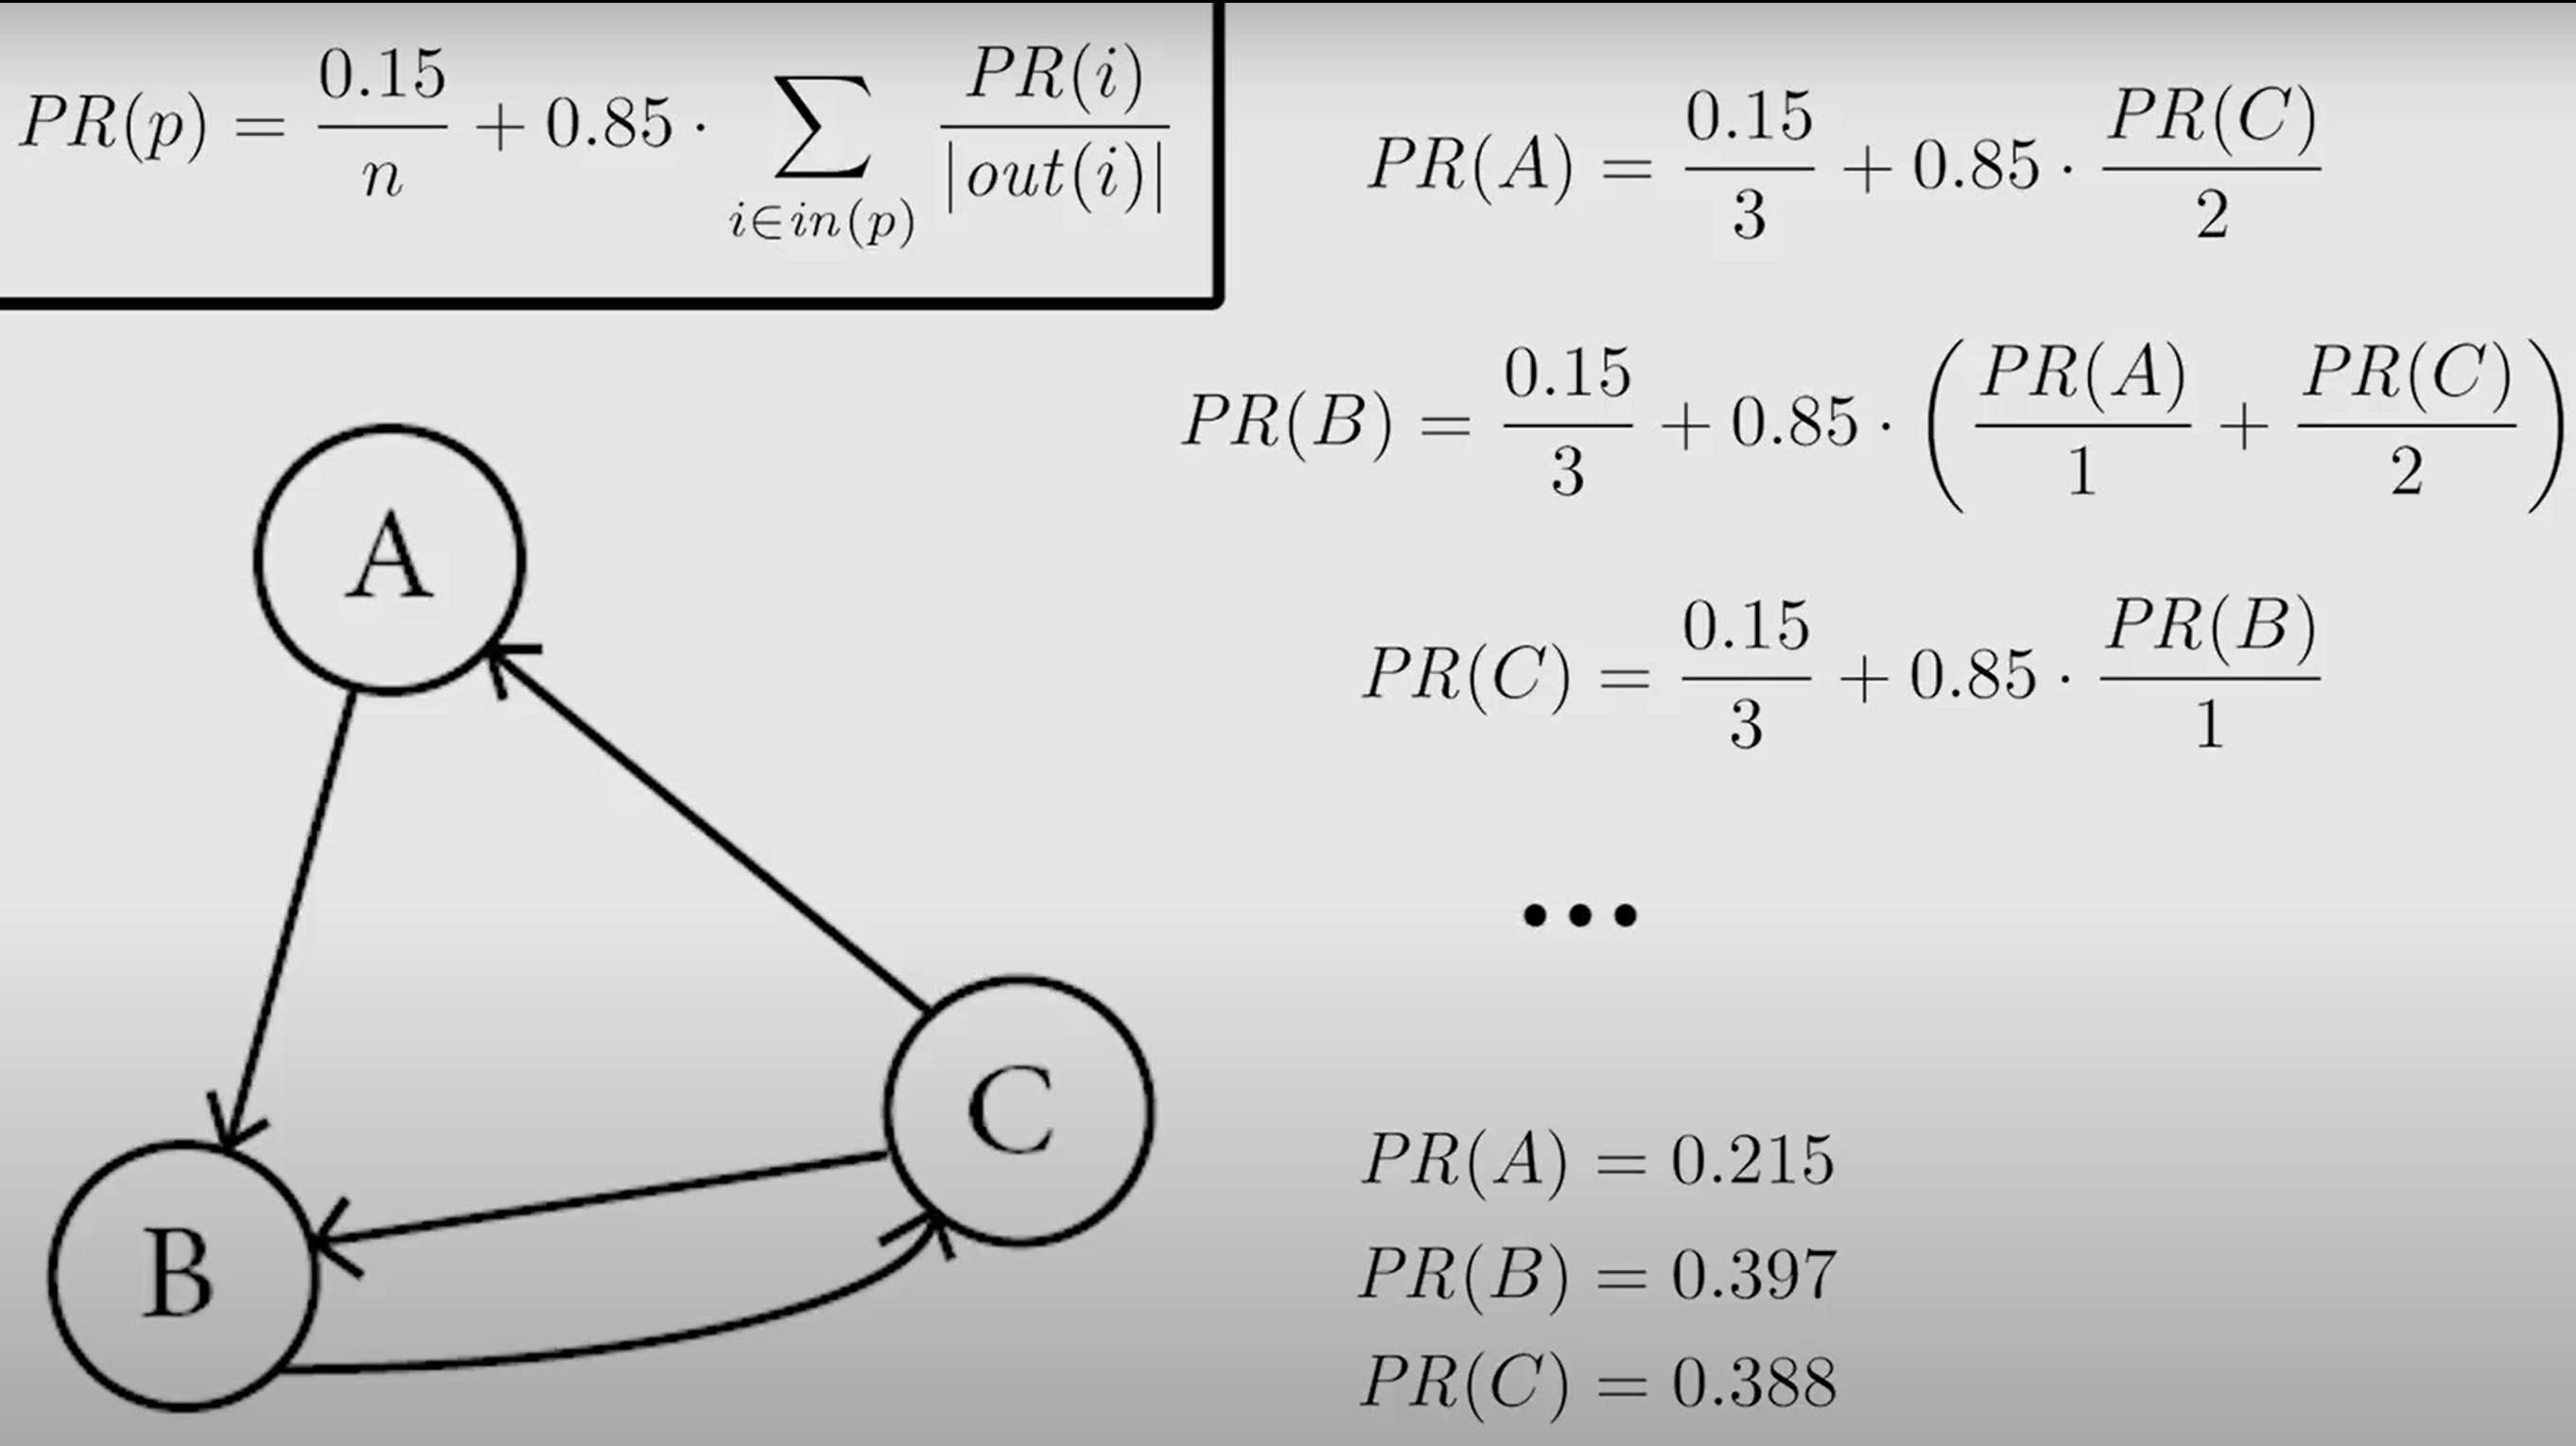